# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп». 

Задача: разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Описание данных:**
Набор данных находится в файле /datasets/insurance.csv.<br>
<br>
**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.<br>
<br>
**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Загрузка данных и их проверка

Присвою переменной имя:

In [2]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('D:\Data\insurance.csv')

Head:

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Info:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Посмотрю на разброс значений в столбцах:

Пол:

In [5]:
data['Пол'].value_counts()

0    2505
1    2495
Name: Пол, dtype: int64

Возраст:

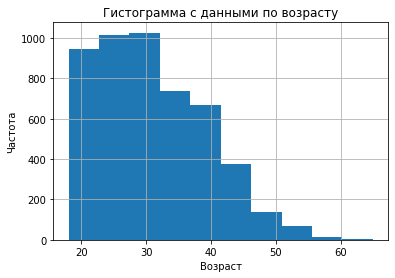

In [6]:
data['Возраст'].hist()

plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.title("Гистограмма с данными по возрасту");

Зарплата:

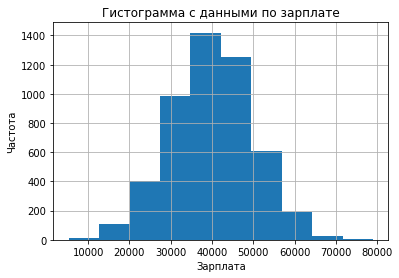

In [7]:
data['Зарплата'].hist()
plt.xlabel("Зарплата")
plt.ylabel("Частота")
plt.title("Гистограмма с данными по зарплате");

Члены семьи:

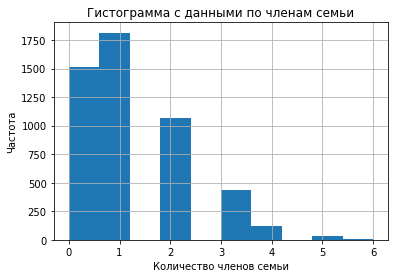

In [8]:
data['Члены семьи'].hist()
plt.xlabel("Количество членов семьи")
plt.ylabel("Частота")
plt.title("Гистограмма с данными по членам семьи");

Страховые выплаты:

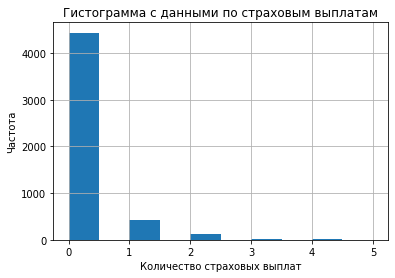

In [9]:
data['Страховые выплаты'].hist();
plt.xlabel("Количество страховых выплат")
plt.ylabel("Частота")
plt.title("Гистограмма с данными по страховым выплатам");

Проверю, есть ли пропуски:

In [10]:
print("Количество пропусков:")
data.isna().sum()

Количество пропусков:


Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Проверю, есть ли дубликаты строк:

In [11]:
print("Количество дубликатов:", data.duplicated().sum())

Количество дубликатов: 153


**Промежуточный вывод:** есть дубликаты строк, надо удалить. 2 типа данных в формате float, можно их перевести в int, если они целочисленные. В остальном все в порядке.

## Предобработка данных

Чистка от дубликатов:

In [12]:
data = data.drop_duplicates().reset_index(drop=True)

Изменение типов данных:

In [13]:
data['Возраст'].value_counts()

19.0    213
25.0    205
31.0    202
26.0    201
22.0    201
27.0    201
32.0    196
30.0    196
29.0    196
28.0    196
23.0    195
21.0    193
20.0    190
36.0    186
33.0    186
24.0    176
35.0    173
34.0    173
37.0    143
39.0    140
38.0    135
41.0    124
18.0    116
40.0    110
42.0     93
43.0     77
44.0     74
45.0     73
46.0     60
47.0     47
49.0     37
48.0     26
50.0     26
52.0     22
51.0     21
53.0     11
55.0      9
54.0      7
56.0      5
59.0      3
60.0      2
58.0      2
57.0      2
65.0      1
61.0      1
62.0      1
Name: Возраст, dtype: int64

Можно перевести в целочисленный формат:

In [14]:
data['Возраст'] = data['Возраст'].astype('int')

Также проверю колонку "Зарплата":

In [15]:
data['Зарплата'].value_counts()

45800.0    28
37100.0    27
38800.0    26
32800.0    26
43200.0    25
           ..
67200.0     1
69200.0     1
14700.0     1
60000.0     1
68400.0     1
Name: Зарплата, Length: 524, dtype: int64

Можно перевести в целочисленный формат:

In [16]:
data['Зарплата'] = data['Зарплата'].astype('int')

Проверка:

In [17]:
data.duplicated().sum() #есть ли дубли

0

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 189.5 KB


**Промежуточный вывод:** удалены дубликаты, изменен тип данных в 2 колонках.

## Умножение матриц

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.) Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.


**Ответ:** Не изменится.


**Обоснование:** параметры линейной регрессии связаны линейным преобразованием.

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Если мы умножим матрицу признаков X на обратимую матрицу, получится новая матрица. Обозначим ее как XP (где X - признаки, P - обратимая матрица). Тогда:

$$ a = Xw $$

$$ a_1 = XPw_1 $$

$$ w = (X^T X)^{-1} X^T y $$

$$ w_1 = ((XP)^T XP)^{-1} (XP)^T y $$

1. Используем свойства матриц в выражении  $ w_1 $, а также вынесем за скобки квадратную матрицу:

$$ w_1 = (P^T X^T XP)^{-1} (XP)^T y $$

$$ w_1 = P^{-1}(X^T X)^{-1}(P^T)^{-1} (XP)^T y $$

2. Подставим выражения в формулу предсказаний. Сравним $a$ и $a_1$. Предположим, что они равны:


$$ Xw = XPw_1 $$

$$ X(X^T X)^{-1} X^T y = XP P^{-1}(X^T X)^{-1}(P^T)^{-1} (XP)^T y $$

$$ X(X^T X)^{-1} X^T y = XP P^{-1}(X^T X)^{-1}(P^T)^{-1} P^T X^T y $$

$$ X(X^T X)^{-1} X^T y = X E (X^T X)^{-1} E X^T y $$

$$ X(X^T X)^{-1} X^T y = X(X^T X)^{-1} X^T y $$

Левая и правая части равны. Доказано, что при умножении признаков на обратимую матрицу качество предсказаний не изменится.

**Промежуточный вывод:** качество линейной регрессии не изменится после преобразования признаков.

## Алгоритм преобразования

**Алгоритм**

1. Разделить данные на features и target.
2. Создать рандомную обратимую матрицу и проверить ее на обратимость.
3. Умножить features на обратимую матрицу.
4. Разделить данные на исходные и преобразованные с помощью train_test_split.
5. Обучить линейную регрессию на исходных данных.
6. Обучить линейную регрессию на преобразованных данных.
7. Вычислить предсказания на исходных данных.
8. Вычислить предсказания на преобразованных данных.
9. Оценить качество линейной регрессии на преобразованных и исходных данных с помощью метрики R2.
10. Сравнить качество моделей.

**Обоснование**

Качество линейной регрессии не изменится, так как это доказано в предыдущем пункте. Этот алгоритм работы поможет на практике доказать, что качество регрессии не меняется. Проверка будет для исходных и преобразованных данных.

## Проверка алгоритма

Выделю признаки и таргет:

In [19]:
features = data.drop(columns=['Страховые выплаты'])
target = data['Страховые выплаты']

Создам рандомную обратимую матрицу:

In [20]:
matrix = np.random.normal(0, 1, (4, 4)) #создание матрицы
np.linalg.inv(matrix) # проверка на обратимость. если матрица необратима, будет ошибка

array([[ 0.32705799,  0.01979544,  0.16612312, -1.23887648],
       [-0.80271904, -1.01063059,  0.52301562, -0.91824889],
       [-3.54582345,  0.58386743,  0.58008733, -1.13815604],
       [-2.70954661,  0.23984046, -0.15131498, -0.9194223 ]])

Умножу признаки на обратимую матрицу:

In [21]:
features_transformed = np.dot(features, matrix)

Разделю данные для исходных данных:

In [22]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

Разделю данные для трансформированных данных:

In [23]:
x_train_transformed, x_test_transformed, y_train_transformed, y_test_transformed\
= train_test_split(features_transformed, target, test_size=0.25, random_state=42)

Обучу 2 модели: на исходных данных и на трансформированных. Сравню полученную метрику R2.

In [24]:
model = LinearRegression()
model.fit(x_train, y_train) #обучение модели на исходных данных

model_transformed = LinearRegression()
model_transformed.fit(x_train_transformed, y_train_transformed) #обучение модели на трансформированных данных

# Оценка качества на исходных данных
pred_original = model.predict(x_test)
r2_original = r2_score(y_test, pred_original)

# Оценка качества на трансформированных данных
pred_transformed = model_transformed.predict(x_test_transformed)
r2_transformed = r2_score(y_test_transformed, pred_transformed)

print("R2 на исходных данных:", r2_original)
print("R2 на преобразованных данных:", r2_transformed)

R2 на исходных данных: 0.44346331080942847
R2 на преобразованных данных: 0.4434633108101128


**Промежуточный вывод:** R2 практически равны, доказано на практике, что умножение признаков на обратимую матрицу не изменит качество модели.

Для расшифровки данных я предлагаю следующий алгоритм:
1. Сначала умножить зашифрованные данные на матрицу, обратную созданной matrix.
2. Перевести формат расшифрованных данных в датафрейм, округлить значения.
3. Изменить формат float в данных на int, как в исходных данных.
4. Заменить названия колонок (0,1,2,3) на те названия, которые были у оригинального датасета.
5. Сравнить 2 датафрейма методом equals и вывести ответ принтом.

In [25]:
features_decrypted = pd.DataFrame(np.round(features_transformed @ np.linalg.inv(matrix),0)) #умножение на обратную матрицу
features_decrypted = features_decrypted.astype('int') #перевод в int

#присвоение названий колонок
features_decrypted = features_decrypted.rename(columns={0 : 'Пол', 1 : 'Возраст', 2 : 'Зарплата', 3 : 'Члены семьи'})

In [26]:
#сравнение датафреймов
equal = features.equals(features_decrypted)

if equal:
    print("Данные равны")
else:
    print("Данные не равны")

Данные равны


**Промежуточный вывод:** Расшифровка данных прошла успешно.

## Общий вывод

1. Была проведена предобработка данных, также данные были изучены.
2. Приведено доказательство того, что при умножении признаков на обратимую матрицу качество регрессии не изменится.
3. Создан алгоритм шифровки данных.
4. Алгоритм опробован на практике. Обучены модели линейной регрессии.
5. Рассчитана метрика R2 для моделей. Она равна 0.443 в обоих случаях.
6. Также данные были проверены на дешифровку. Их получилось вернуть в первоначальном виде после умножения на обратную матрицу.

Выявлено, что качество моделей, обученных на исходных и трансформированных данных, одинаково. А значит, метод работает и его можно использовать.